In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy.stats import chi2_contingency
import seaborn as sns

In [3]:
df=pd.read_csv("C:/cognify/data.csv")

In [4]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


### Change the column name

In [5]:
df.rename(columns={"Restaurant Name": "Restaurant","Aggregate rating":"Aggr_rating","Price range": "Prange"},inplace=True)
df.columns=df.columns.str.replace(" ","")

#### Q.1_Determine the top three most common cuisines in the dataset.

In [6]:
Cuisines_count=df.Cuisines.value_counts()
count=Cuisines_count.sort_values(ascending=False)
top_3=count.head(3)
top_3

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

#### Q.2 Calculate the percentage ofrestaurants that serve each of the top cuisines.

In [7]:
top=df.Cuisines.value_counts()
top_10=top.sort_values(ascending=False)
Top10=top_10.head(10)
total_restaurant=len(df)
percentage_of_restaurants=(Top10/total_restaurant)*100
percentage_of_restaurants


North Indian                      9.800021
North Indian, Chinese             5.350225
Chinese                           3.706418
Fast Food                         3.706418
North Indian, Mughlai             3.497016
Cafe                              3.130562
Bakery                            2.282484
North Indian, Mughlai, Chinese    2.062611
Bakery, Desserts                  1.779918
Street Food                       1.560046
Name: Cuisines, dtype: float64

#### Q.3 Identify the city with the highest number of restaurants in the dataset.

In [8]:
df.City.value_counts().sort_values(ascending=False).head(1)

New Delhi    5473
Name: City, dtype: int64

#### Q.4 Calculate the average rating for restaurants in each city.


In [9]:
avg_rating=df.groupby(by="City")[["Aggr_rating"]].mean()

#### Q.5 Determine the city with the highest average rating.


In [10]:
highest_avg_city=avg_rating.idxmax()
print("city of highest avg rating:",highest_avg_city)

city of highest avg rating: Aggr_rating    Inner City
dtype: object


#### Q.6 Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

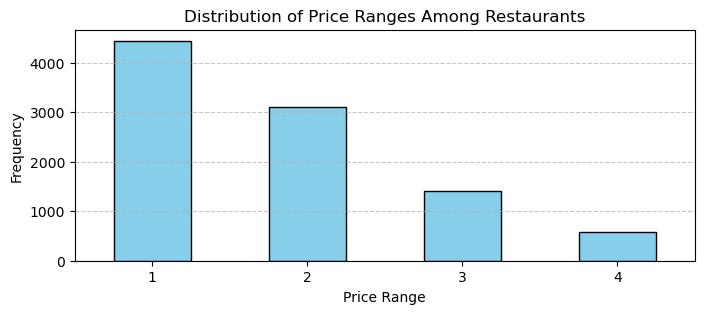

In [11]:
# Plotting a bar chart
price_range=df["Prange"]
plt.figure(figsize=(8, 3))
price_range.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Q.7Calculate the percentage of restaurants in each price range category.

In [12]:
prange_count=df.Prange.value_counts()
total_rest=len(df)
restaurant_per=(prange_count/total_rest)*100
restaurant_per

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Prange, dtype: float64

#### Q.8 Determine the percentage of restaurants that offer online delivery.

In [13]:
#df[df["HasOnlinedelivery"]=="Yes"].value_counts().sum()
count=df.HasOnlinedelivery.value_counts()
total_rest=len(df)
restaurant_Online=(count/total_rest)*100
restaurant_Online

No     74.337766
Yes    25.662234
Name: HasOnlinedelivery, dtype: float64

#### Q. 9 Compare the average ratings of restaurants with and without online delivery.

In [14]:
df.groupby(by=df["HasOnlinedelivery"])[["Aggr_rating"]].mean()

,Aggr_rating
HasOnlinedelivery,
No,2.465296
Yes,3.248837


##### Q.10 Analyze the distribution of aggregate
ratings and determine the most common
rating range.

In [15]:
min_rating = df['Aggr_rating'].min()
max_rating = df['Aggr_rating'].max()

bins = [i for i in range(int(min_rating), int(max_rating) + 2)]
rating_ranges = pd.cut(df['Aggr_rating'], bins=bins, right=False)

# Count the occurrences of each rating range
rating_counts = rating_ranges.value_counts()

# Determine the most common rating range
most_common_rating_range = rating_counts.idxmax()

print("Most common rating range:", most_common_rating_range)

Most common rating range: [3, 4)


##### Q.11 Calculate the average number of votes
##### received by restaurants.

In [16]:
df.head(2)

,RestaurantID,Restaurant,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,...,Currency,HasTablebooking,HasOnlinedelivery,Isdeliveringnow,Switchtoordermenu,Prange,Aggr_rating,Ratingcolor,Ratingtext,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [17]:
df.groupby(by=df["Restaurant"])["Votes"].agg(["mean"]).sort_values(by="mean",ascending=False).head(10)

,mean
Restaurant,
Toit,10934.0
Hauz Khas Social,7931.0
Peter Cat,7574.0
Big Brewsky,5705.0
The Black Pearl,5385.0
BarBQ,5288.0
Warehouse Cafe,4914.0
Truffles,4841.0
Mocambo,4464.0


##### Q.12 Identify the most common combinations of
##### cuisines in the dataset.

In [18]:
cuisines_series = df['Cuisines']
cuisine_lists = cuisines_series.str.split(', ')

cuisine_flat_list = [cuisine for sublist in cuisine_lists.dropna() for cuisine in sublist]

# Count the occurrences of each cuisine combination
cuisine_counts = pd.Series(cuisine_flat_list).value_counts()

# Determine the most common combinations of cuisines
most_common_cuisine_combinations = cuisine_counts.head(10)  # Adjust as needed

print("Most common combinations of cuisines:")
print(most_common_cuisine_combinations)


Most common combinations of cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
dtype: int64


##### Q.13 Determine if certain cuisine combinations
##### tend to have higher ratings.

In [19]:
# Extract the 'Cuisines' and 'Aggr_rating' columns
cuisin_rating_data = df[["Cuisines", "Aggr_rating"]]

# Split the cuisine combinations into individual cuisine types using .loc
cuisin_rating_data.loc[:, "Cuisines"] = cuisin_rating_data["Cuisines"].str.split(",")

# Explode the DataFrame to have one row per cuisine
cuisin_rating_explode = cuisin_rating_data.explode("Cuisines")

# Calculate the average rating for each cuisine
avg_rating_per_cuisine = cuisin_rating_explode.groupby("Cuisines")["Aggr_rating"].mean()

# Print the average ratings for each cuisine
print(avg_rating_per_cuisine)


Cuisines
 Afghani         3.528571
 African         3.216667
 American        3.924107
 Andhra          4.028571
 Arabian         3.365217
                   ...   
Turkish          3.171429
Turkish Pizza    4.300000
Vietnamese       4.133333
Western          3.700000
World Cuisine    4.500000
Name: Aggr_rating, Length: 249, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11544\146661964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuisin_rating_data.loc[:, "Cuisines"] = cuisin_rating_data["Cuisines"].str.split(",")


##### Q.14 Identify if there are any restaurant chains
##### present in the dataset.




In [20]:
restaurant_names = df['Restaurant'].unique()

# Initialize a dictionary to store counts of restaurant names
restaurant_counts = {}

# Count occurrences of each restaurant name
for name in restaurant_names:
    count = df[df['Restaurant'] == name].shape[0]
    restaurant_counts[name] = count

# Identify chains with multiple locations
chains = {name: count for name, count in restaurant_counts.items() if count > 1}

# Print the identified chains
print("Restaurant Chains:")
for chain, count in chains.items():
    print(f"{chain}: {count} locations")


Restaurant Chains:
Din Tai Fung: 2 locations
Silantro Fil-Mex: 2 locations
Coco Bambu: 2 locations
Garota de Ipanema: 2 locations
Chick-fil-A: 2 locations
The National: 2 locations
Mellow Mushroom: 2 locations
Rhinehart's Oyster Bar: 2 locations
Texas Roadhouse: 5 locations
Granite City Food & Brewery: 2 locations
Taste of India: 2 locations
Chili's Grill & Bar: 2 locations
Los Agaves: 2 locations
The Cafe: 2 locations
HuHot Mongolian Grill: 3 locations
Ichiban: 2 locations
Gazebo: 3 locations
The Crab Shack: 2 locations
Ceviche Tapas Bar & Restaurant: 2 locations
Applebee's: 4 locations
Punjab Grill: 5 locations
The Cheesecake Factory: 2 locations
Barbeque Nation: 26 locations
Farzi Cafe: 6 locations
AB's Absolute Barbecues: 2 locations
Hard Rock Cafe: 3 locations
SpiceKlub: 2 locations
Pizza Hut: 30 locations
Nando's: 5 locations
TGI Friday's: 6 locations
Pind Balluchi: 20 locations
La Pino'z Pizza: 3 locations
Mocha: 7 locations
KFC: 18 locations
McDonald's: 48 locations
Subway: 63 

# Task: Restaurant Reviews

##### Calculate the average length of reviews and
##### explore if there is a relationship between
##### review length and rating.

## Task: Votes Analysis
##### Q.Identify the restaurants with the highest and
##### lowest number of votes


In [21]:
vote=df[["Restaurant","Votes"]]

In [22]:
vote_sorted = vote.sort_values(by='Votes', ascending=False)
highest_vote=vote_sorted.head(1)
lowest_vote=vote_sorted.tail(1)
print("Highest Vote Entry:")
print(highest_vote)
print("\nLowest Vote Entry:")
print(lowest_vote)


Highest Vote Entry:
    Restaurant  Votes
728       Toit  10934

Lowest Vote Entry:
                   Restaurant  Votes
4524  Singh Chinese Fast Food      0


#### 16Analyze if there is a correlation between the
#### number of votes and the rating of a
#### restaurant.


In [23]:
correlation = df["Votes"].corr(df["Aggr_rating"])
correlation
print("Correlation coefficient between Votes and Aggregate rating:", correlation)

Correlation coefficient between Votes and Aggregate rating: 0.3136905841954117


#### Task: Price Range vs. Online Delivery and
#### Table Booking

##### Analyze if there is a relationship between the
##### price range and the availability of online
##### delivery and table booking.

In [28]:
conti=pd.crosstab(df["Prange"],[df["HasOnlinedelivery"],df["HasTablebooking"]])
chi2, p, dof, expected = chi2_contingency(conti)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 3778.7126357124143
p-value: 0.0
Degrees of Freedom: 9
Expected Frequencies Table:
[[2967.16448539  336.40582138  938.02785049  202.40184274]
 [2078.48403309  235.6506125   657.08386556  141.78148885]
 [ 940.09171814  106.58402262  297.19694273   64.12731651]
 [ 391.25976338   44.3595435   123.69134122   26.6893519 ]]


##### Q.18 Determine if higher-priced restaurants are
##### more likely to offer these services.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11544\3099797260.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(by=df.Prange).mean().reset_index()


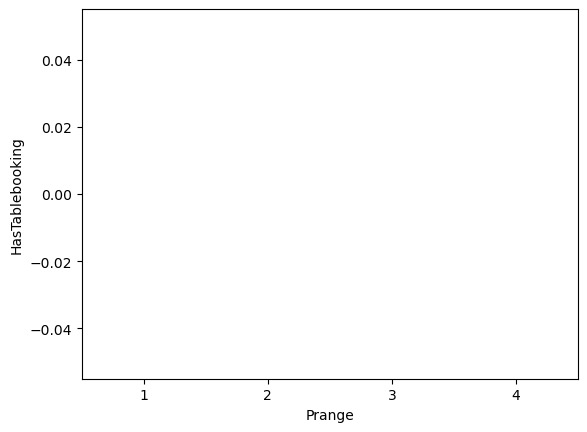

In [40]:
# Convert 'Online Delivery' and 'Table Booking' to binary values (0 for No, 1 for Yes)
df['HasOnlinedelivery'] = df['HasOnlinedelivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['HasTablebooking'] = df['HasTablebooking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by 'Price Range' and calculate the mean of 'Online Delivery' and 'Table Booking'
grouped_df = df.groupby(by=df.Prange).mean().reset_index()

# Visualization
sns.barplot(x='Prange', y='HasOnlinedelivery', data=grouped_df, color='skyblue')
sns.barplot(x='Prange', y='HasTablebooking', data=grouped_df, color='salmon')

# Statistical Testing
# You can use chi-square test of independence or logistic regression for statistical testing
plt.show()



In [30]:
df.head()

,RestaurantID,Restaurant,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,...,Currency,HasTablebooking,HasOnlinedelivery,Isdeliveringnow,Switchtoordermenu,Prange,Aggr_rating,Ratingcolor,Ratingtext,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
